In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, statistical_tests, visualize

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
df.columns.tolist()

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'literary_texts'

In [8]:
df.shape

(1041157, 77)

# Publication Type

In [9]:
df[["content_type","source"]].sample(50)

content_type   source
ppn                                                   
162139851X                               None  k10plus
504311298                          Wörterbuch  k10plus
672807351                         Zeitschrift  k10plus
1615426043                               None  k10plus
326233466                                None    hebis
1655907727                               None  k10plus
265772273                                None  k10plus
354217291                           Biografie  k10plus
662838572                                None  k10plus
309082722                                None  k10plus
026552280                                None  k10plus
026374900                                None  k10plus
60941920X                          Einführung  k10plus
241634490                                None  k10plus
121903303                                None  k10plus
023108371                          Einführung  k10plus
133160963                                None    hebis
1602248524                               None  k10plus
615578853                                None  k10plus
68036076X    Aufsatzsammlung|Konferenzschrift  k10plus
1140310356                               None  k10plus
1091714886                               None  k10plus
220031991                                None  k10plus
83782785X                 Monografische Reihe  k10plus
450005895                                None    hebis
357781554                     Aufsatzsammlung  k10plus
1009375504                    Aufsatzsammlung  k10plus
1000013847                   Hochschulschrift  k10plus
043240453                    Konferenzschrift  k10plus
122852281                                None    hebis
024708852                     Aufsatzsammlung  k10plus
527981869                                None  k10plus
1696416132                               None  k10plus
254736726                                None  k10plus
247127167                                None  k10plus
333669134       Konferenzschrift|Bibliografie  k10plus
1652421394                               None  k10plus
1341607933                               None  k10plus
133347907                                None    hebis
225710455         Aufgabensammlung|Einführung  k10plus
533028477                    Hochschulschrift  k10plus
043348823                                None  k10plus
106803999                                None    hebis
543999394                    Hochschulschrift  k10plus
320127451   Konferenzschrift|Konferenzschrift  k10plus
1666080403                        Zeitschrift  k10plus
1330797221                               None  k10plus
1168409365                               None  k10plus
039960242                     Aufsatzsammlung  k10plus
278199151                          Wörterbuch  k10plus

In [10]:
round(df["content_type"].notna().sum() / df.shape[0], 2)*100

39.0

In [11]:
df["content_type"].dropna()

ppn
194869113        Hochschulschrift
1605892661       Hochschulschrift
630955840              Wörterbuch
021627924              Wörterbuch
021627924              Wörterbuch
                     ...         
288183258             Zeitschrift
288183258             Zeitschrift
288183258             Zeitschrift
291361730         Aufsatzsammlung
40032590X     Ausstellungskatalog
Name: content_type, Length: 404939, dtype: object

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


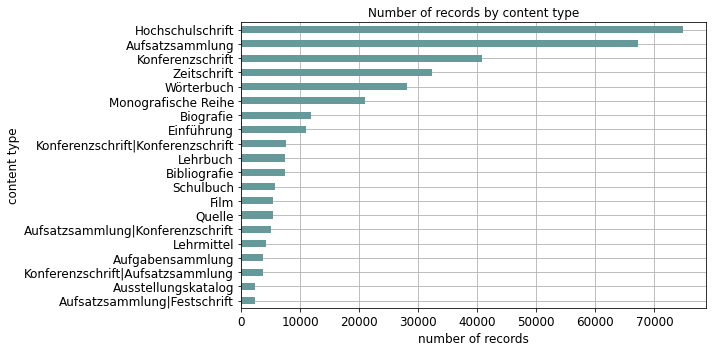

In [12]:
visualize.plot_bar_counter(df, "content_type", head = 20, percentage = False, title = "Number of records by content type", xlabel= "number of records", ylabel = "content type", figure_name = "content_type_number")


In [13]:
df.groupby("year_publication")["content_type"].count()

year_publication
1980     4498
1981     4565
1982     4657
1983     5136
1984     5653
1985     5500
1986     6443
1987     6314
1988     6964
1989     7385
1990     7944
1991     8593
1992     8688
1993     9772
1994    11413
1995    11757
1996    12159
1997    12120
1998    12812
1999    12848
2000    13288
2001    13180
2002    12002
2003    13228
2004    13269
2005    13647
2006    13732
2007    13541
2008    13242
2009    12070
2010    12712
2011    12497
2012    11751
2013    11081
2014    10302
2015    10515
2016    11221
2017    10488
2018     9372
2019     8580
Name: content_type, dtype: int64

In [14]:
df[["content_type"]].isna().groupby(df["year_publication"]).sum()["content_type"]

year_publication
1980    12832.0
1981    11942.0
1982    12191.0
1983    13187.0
1984    14268.0
1985    14577.0
1986    16211.0
1987    16361.0
1988    18523.0
1989    18968.0
1990    20873.0
1991    20872.0
1992    20155.0
1993    20069.0
1994    20849.0
1995    19758.0
1996    19214.0
1997    18134.0
1998    18010.0
1999    18287.0
2000    18349.0
2001    17805.0
2002    17222.0
2003    16493.0
2004    15981.0
2005    16465.0
2006    16400.0
2007    17383.0
2008    15963.0
2009    14833.0
2010    15170.0
2011    16519.0
2012    15174.0
2013    13050.0
2014    13390.0
2015    12554.0
2016    11575.0
2017     9476.0
2018     9079.0
2019     8056.0
Name: content_type, dtype: float64

In [15]:
df.groupby("year_publication")["ppn"].count()

year_publication
1980    17330
1981    16507
1982    16848
1983    18323
1984    19921
1985    20077
1986    22654
1987    22675
1988    25487
1989    26353
1990    28817
1991    29465
1992    28843
1993    29841
1994    32262
1995    31515
1996    31373
1997    30254
1998    30822
1999    31135
2000    31637
2001    30985
2002    29224
2003    29721
2004    29250
2005    30112
2006    30132
2007    30924
2008    29205
2009    26903
2010    27882
2011    29016
2012    26925
2013    24131
2014    23692
2015    23069
2016    22796
2017    19964
2018    18451
2019    16636
Name: ppn, dtype: int64

In [16]:
df.loc[df["year_publication"] == 1980].shape

(17330, 77)

In [17]:
df.loc[df["year_publication"] == 1980].shape

(17330, 77)

In [18]:
#df.loc[df["content_type"].]

In [19]:
df[["content_type"]].isna().groupby(df["year_publication"]).sum()["content_type"]

year_publication
1980    12832.0
1981    11942.0
1982    12191.0
1983    13187.0
1984    14268.0
1985    14577.0
1986    16211.0
1987    16361.0
1988    18523.0
1989    18968.0
1990    20873.0
1991    20872.0
1992    20155.0
1993    20069.0
1994    20849.0
1995    19758.0
1996    19214.0
1997    18134.0
1998    18010.0
1999    18287.0
2000    18349.0
2001    17805.0
2002    17222.0
2003    16493.0
2004    15981.0
2005    16465.0
2006    16400.0
2007    17383.0
2008    15963.0
2009    14833.0
2010    15170.0
2011    16519.0
2012    15174.0
2013    13050.0
2014    13390.0
2015    12554.0
2016    11575.0
2017     9476.0
2018     9079.0
2019     8056.0
Name: content_type, dtype: float64

In [20]:
df[["content_type"]].notna().groupby(df["year_publication"]).sum()["content_type"].div(df.groupby("year_publication")["ppn"].count())

year_publication
1980    0.259550
1981    0.276549
1982    0.276413
1983    0.280303
1984    0.283771
1985    0.273945
1986    0.284409
1987    0.278456
1988    0.273237
1989    0.280234
1990    0.275671
1991    0.291634
1992    0.301217
1993    0.327469
1994    0.353760
1995    0.373060
1996    0.387563
1997    0.400608
1998    0.415677
1999    0.412655
2000    0.420015
2001    0.425367
2002    0.410690
2003    0.445073
2004    0.453641
2005    0.453208
2006    0.455728
2007    0.437880
2008    0.453416
2009    0.448649
2010    0.455921
2011    0.430693
2012    0.436435
2013    0.459202
2014    0.434830
2015    0.455806
2016    0.492235
2017    0.525346
2018    0.507940
2019    0.515749
dtype: float64

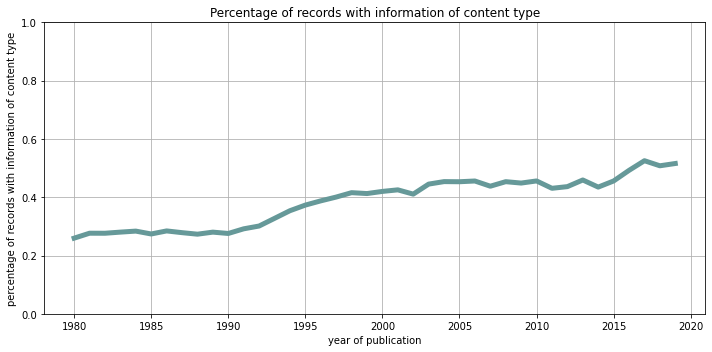

In [21]:
ax = df[["content_type"]].notna().groupby(df["year_publication"]).sum()["content_type"].div(df.groupby("year_publication")["ppn"].count()).plot.line(ylim=(0,1),
color = color, figsize = figsize, grid=True, title = "Percentage of records with information of content type",
linewidth=5)

ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("percentage of records with information of content type")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig("./../visualizations/content_type_percentage_chronological.png")


In [22]:
"""df.groupby("year_publication")["content_type"].count().plot.line(color = color, figsize = figsize, grid=True, title = "Number of records by content type",
linewidth=5)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title ="Languages")

ax.set_axisbelow(True)

ax.set_xlabel("number of records")
ax.set_ylabel("content type")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig("./../visualizations/content_type_number.png")
"""

'df.groupby("year_publication")["content_type"].count().plot.line(color = color, figsize = figsize, grid=True, title = "Number of records by content type",\nlinewidth=5)\n#plt.legend(loc=\'center left\', bbox_to_anchor=(1.0, 0.5), title ="Languages")\n\nax.set_axisbelow(True)\n\nax.set_xlabel("number of records")\nax.set_ylabel("content type")\nfig = ax.get_figure()\nplt.tight_layout()\n\nfig.savefig("./../visualizations/content_type_number.png")\n'

In [23]:
content_type_df = tokenize.tokenize_column(df, "content_type",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w\\s]+\\b', max_features = 100, add_name_of_original_column = True)

Shape of tokens:  (1041157, 100)
Shape of tokens after filtering:  (1041157, 100)


In [24]:
[column for column in content_type_df.columns.tolist() if "|" in column]

[]

In [25]:
content_type_df

none@content_type  aufsatzsammlung@content_type  \
1642067407                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
...                       ...                           ...   
448323834                   1                             0   
448323834                   1                             0   
44832184X                   1                             0   
44832184X                   1                             0   
44832184X                   1                             0   

            hochschulschrift@content_type  konferenzschrift@content_type  \
1642067407                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
...                                   ...                            ...   
448323834                               0                              0   
448323834                               0                              0   
44832184X                               0                              0   
44832184X                               0                              0   
44832184X                               0                              0   

            zeitschrift@content_type  wörterbuch@content_type  \
1642067407                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
...                              ...                      ...   
448323834                          0                        0   
448323834                          0                        0   
44832184X                          0                        0   
44832184X                          0                        0   
44832184X                          0                        0   

            monografische reihe@content_type  bibliografie@content_type  \
1642067407                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
...                                      ...                        ...   
448323834                                  0                          0   
448323834                                  0                          0   
44832184X                                  0                          0   
44832184X                                  0                          0   
44832184X                                  0                          0   

            biografie@content_type  einführung@content_type  ...  \
1642067407                       0                        0  ...   
1678415065                       0                        0  ...   
1678415065                       0                        0  ...   
1678415065                       0                        0  ...   
1678415065                       0                        0  ...   
...                            ...                      ...  ...   
448323834                        0                        0  ...   
448323834                        0                        0  ...   
44832184X                        0              

In [26]:
df = pd.concat([df, content_type_df], axis=1)

In [27]:
df[content_type_df.columns.tolist()[0:10]]

none@content_type  aufsatzsammlung@content_type  \
ppn                                                           
1642067407                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
1678415065                  1                             0   
...                       ...                           ...   
448323834                   1                             0   
448323834                   1                             0   
44832184X                   1                             0   
44832184X                   1                             0   
44832184X                   1                             0   

            hochschulschrift@content_type  konferenzschrift@content_type  \
ppn                                                                        
1642067407                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
1678415065                              0                              0   
...                                   ...                            ...   
448323834                               0                              0   
448323834                               0                              0   
44832184X                               0                              0   
44832184X                               0                              0   
44832184X                               0                              0   

            zeitschrift@content_type  wörterbuch@content_type  \
ppn                                                             
1642067407                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
1678415065                         0                        0   
...                              ...                      ...   
448323834                          0                        0   
448323834                          0                        0   
44832184X                          0                        0   
44832184X                          0                        0   
44832184X                          0                        0   

            monografische reihe@content_type  bibliografie@content_type  \
ppn                                                                       
1642067407                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
1678415065                                 0                          0   
...                                      ...                        ...   
448323834                                  0                          0   
448323834                                  0                          0   
44832184X                                  0                          0   
44832184X                                  0                          0   
44832184X                                  0                          0   

            biografie@content_type  einführung@content_type  
ppn                                                          
1642067407                       0                        0  
1678415065                       0                        0  
1678415065                       0                        0  
1678415065                       0                        0  
167841506

In [28]:
years_content_type_df = df.groupby(["year_publication"])[content_type_df.columns.tolist()[0:20]].sum()
years_content_type_df

none@content_type  aufsatzsammlung@content_type  \
year_publication                                                    
1980                          12832                           720   
1981                          11942                           668   
1982                          12191                           887   
1983                          13187                          1217   
1984                          14268                          1229   
1985                          14577                          1189   
1986                          16211                          1306   
1987                          16361                          1215   
1988                          18523                          1593   
1989                          18968                          1461   
1990                          20873                          1553   
1991                          20872                          1581   
1992                          20155                          1684   
1993                          20069                          1759   
1994                          20849                          2182   
1995                          19758                          2218   
1996                          19214                          2209   
1997                          18134                          2568   
1998                          18010                          2502   
1999                          18287                          2755   
2000                          18349                          2826   
2001                          17805                          2721   
2002                          17222                          2423   
2003                          16493                          3064   
2004                          15981                          2796   
2005                          16465                          2849   
2006                          16400                          2800   
2007                          17383                          3072   
2008                          15963                          3334   
2009                          14833                          2680   
2010                          15170                          3280   
2011                          16519                          3323   
2012                          15174                          3035   
2013                          13050                          3007   
2014                          13390                          2938   
2015                          12554                          2764   
2016                          11575                          2945   
2017                           9476                          2416   
2018                           9079                          2363   
2019                           8056                          2100   

                  hochschulschrift@content_type  \
year_publication                                  
1980                                       1207   
1981                                       1134   
1982                                       1051   
1983                                        915   
1984                                       1239   
1985                                        848   
1986                                       1114   
1987                                       1239   
1988                                       1327   
1989                                       1100   
1990                                       1285   
1991                                       1473   
1992                                       1652   
1993                                       1671   
1994                                       2195   
1995                                       2227   
1996                                       2420   
1997                                       2625   
1998                                       2365   
1999                                       2321 

In [29]:
years_content_type_df

none@content_type  aufsatzsammlung@content_type  \
year_publication                                                    
1980                          12832                           720   
1981                          11942                           668   
1982                          12191                           887   
1983                          13187                          1217   
1984                          14268                          1229   
1985                          14577                          1189   
1986                          16211                          1306   
1987                          16361                          1215   
1988                          18523                          1593   
1989                          18968                          1461   
1990                          20873                          1553   
1991                          20872                          1581   
1992                          20155                          1684   
1993                          20069                          1759   
1994                          20849                          2182   
1995                          19758                          2218   
1996                          19214                          2209   
1997                          18134                          2568   
1998                          18010                          2502   
1999                          18287                          2755   
2000                          18349                          2826   
2001                          17805                          2721   
2002                          17222                          2423   
2003                          16493                          3064   
2004                          15981                          2796   
2005                          16465                          2849   
2006                          16400                          2800   
2007                          17383                          3072   
2008                          15963                          3334   
2009                          14833                          2680   
2010                          15170                          3280   
2011                          16519                          3323   
2012                          15174                          3035   
2013                          13050                          3007   
2014                          13390                          2938   
2015                          12554                          2764   
2016                          11575                          2945   
2017                           9476                          2416   
2018                           9079                          2363   
2019                           8056                          2100   

                  hochschulschrift@content_type  \
year_publication                                  
1980                                       1207   
1981                                       1134   
1982                                       1051   
1983                                        915   
1984                                       1239   
1985                                        848   
1986                                       1114   
1987                                       1239   
1988                                       1327   
1989                                       1100   
1990                                       1285   
1991                                       1473   
1992                                       1652   
1993                                       1671   
1994                                       2195   
1995                                       2227   
1996                                       2420   
1997                                       2625   
1998                                       2365   
1999                                       2321 

In [30]:
years_content_type_df.columns = years_content_type_df.columns.str.extract(r"(.*?)@")[0].values.tolist()

In [31]:
years_content_type_df.head()

none  aufsatzsammlung  hochschulschrift  konferenzschrift  \
year_publication                                                               
1980              12832              720              1207               461   
1981              11942              668              1134               559   
1982              12191              887              1051               578   
1983              13187             1217               915               643   
1984              14268             1229              1239               654   

                  zeitschrift  wörterbuch  monografische reihe  bibliografie  \
year_publication                                                               
1980                      606         479                  382           259   
1981                      744         357                  385           352   
1982                      767         487                  332           367   
1983                      706         458                  497           553   
1984                      774         521                  439           397   

                  biografie  einführung  festschrift  lehrbuch  quelle  \
year_publication                                                         
1980                     74         172          152         0      48   
1981                     37         159          114        23      61   
1982                     87         111          173         4     100   
1983                     65         227          244        13      77   
1984                    225         122          244        10     119   

                  schulbuch  film  ausstellungskatalog  lehrmittel  \
year_publication                                                     
1980                     23     2                   19          33   
1981                     54     6                   51          34   
1982                      3    13                   58          21   
1983                     13    15                   33           2   
1984                      7    30                   89          88   

                  aufgabensammlung  mehrsprachiges wörterbuch  verzeichnis  
year_publication                                                            
1980                             5                         12           17  
1981                            28                         15            3  
1982                             9                         45           29  
1983                             2                         83           43  
1984                            21                         26           21

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


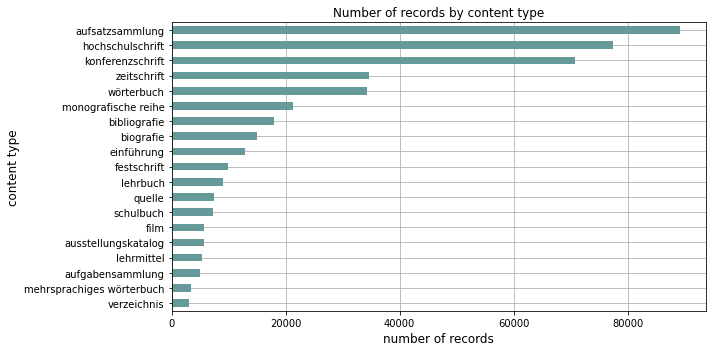

In [32]:
visualize.plot_bars(years_content_type_df.iloc[:,1:], head=20, title = "Number of records by content type", xlabel= "number of records", ylabel = "content type", figure_name = "content_type_number")

<AxesSubplot:>

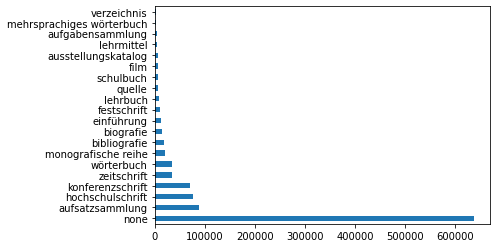

In [33]:
years_content_type_df.sum().plot.barh()

In [34]:
years_content_type_df.loc[:].div(years_content_type_df.sum(axis='columns'), axis="index")*100

none  aufsatzsammlung  hochschulschrift  \
year_publication                                                 
1980              73.313146         4.113581          6.895961   
1981              71.397824         3.993782          6.779864   
1982              70.415295         5.123318          6.070583   
1983              69.430843         6.407624          4.817564   
1984              69.522000         5.988403          6.037129   
1985              71.117725         5.800849          4.137191   
1986              70.719365         5.697335          4.859748   
1987              71.658199         5.321479          5.426594   
1988              71.495291         6.148680          5.121970   
1989              70.932276         5.463520          4.113534   
1990              71.763048         5.339339          4.417933   
1991              69.710431         5.280385          4.919675   
1992              68.619774         5.733351          5.624404   
1993              65.163322         5.711410          5.425677   
1994              63.259300         6.620547          6.659992   
1995              61.392661         6.891837          6.919802   
1996              59.769185         6.871559          7.527919   
1997              58.002815         8.213920          8.396238   
1998              56.418771         7.837855          7.408684   
1999              56.758434         8.550855          7.203824   
2000              55.636750         8.568830          7.434809   
2001              55.067578         8.415551          6.720688   
2002              56.599185         7.963060          7.946628   
2003              53.033860         9.852407          7.180295   
2004              52.456918         9.177745          8.327589   
2005              52.767362         9.130532          7.996026   
2006              52.584327         8.977812          8.067205   
2007              54.673838         9.662200          6.661634   
2008              53.135610        11.097796          6.540843   
2009              53.287110         9.627820          6.865211   
2010              52.812979        11.419022          7.161259   
2011              55.050488        11.074083          6.771753   
2012              53.902170        10.781145          6.585912   
2013              52.298321        12.050655          8.632229   
2014              55.048512        12.078605          8.900674   
2015              53.113894        11.694026          9.709765   
2016              48.487768        12.336629         11.549095   
2017              46.414577        11.833856         13.533503   
2018              47.821965        12.446668         13.600211   
2019              47.975226        12.505955         14.905908   

                  konferenzschrift  zeitschrift  wörterbuch  \
year_publication                                              
1980                      2.633834     3.462264    2.736674   
1981                      3.342102     4.448165    2.134402   
1982                      3.338532     4.430197    2.812915   
1983                      3.385458     3.717159    2.411415   
1984                      3.186669     3.771378    2.538615   
1985                      2.907743     4.303069    2.961409   
1986                      3.350347     3.398334    3.136588   
1987                      3.911177     1.857043    2.877540   
1988                      3.280840     2.698008    2.447121   
1989                      3.676003     2.812161    3.283348   
1990                      3.836897     1.932201    3.252424   
1991                      4.872917     2.889015    2.945793   
1992                      4.248945     1.950838    3.758682   
1993                      6.065329     2.373531    3.490486   
1994                      5.103465     2.706475    4.202318   
1995                      7.031663     2.299351    4.402946   
1996                      6.292967     3.648863    4.286559   
1997                      6.531474     3.278531    3.

In [35]:
years_content_type_df.loc[:].div(years_content_type_df.sum(axis='columns'), axis="index")*100

none  aufsatzsammlung  hochschulschrift  \
year_publication                                                 
1980              73.313146         4.113581          6.895961   
1981              71.397824         3.993782          6.779864   
1982              70.415295         5.123318          6.070583   
1983              69.430843         6.407624          4.817564   
1984              69.522000         5.988403          6.037129   
1985              71.117725         5.800849          4.137191   
1986              70.719365         5.697335          4.859748   
1987              71.658199         5.321479          5.426594   
1988              71.495291         6.148680          5.121970   
1989              70.932276         5.463520          4.113534   
1990              71.763048         5.339339          4.417933   
1991              69.710431         5.280385          4.919675   
1992              68.619774         5.733351          5.624404   
1993              65.163322         5.711410          5.425677   
1994              63.259300         6.620547          6.659992   
1995              61.392661         6.891837          6.919802   
1996              59.769185         6.871559          7.527919   
1997              58.002815         8.213920          8.396238   
1998              56.418771         7.837855          7.408684   
1999              56.758434         8.550855          7.203824   
2000              55.636750         8.568830          7.434809   
2001              55.067578         8.415551          6.720688   
2002              56.599185         7.963060          7.946628   
2003              53.033860         9.852407          7.180295   
2004              52.456918         9.177745          8.327589   
2005              52.767362         9.130532          7.996026   
2006              52.584327         8.977812          8.067205   
2007              54.673838         9.662200          6.661634   
2008              53.135610        11.097796          6.540843   
2009              53.287110         9.627820          6.865211   
2010              52.812979        11.419022          7.161259   
2011              55.050488        11.074083          6.771753   
2012              53.902170        10.781145          6.585912   
2013              52.298321        12.050655          8.632229   
2014              55.048512        12.078605          8.900674   
2015              53.113894        11.694026          9.709765   
2016              48.487768        12.336629         11.549095   
2017              46.414577        11.833856         13.533503   
2018              47.821965        12.446668         13.600211   
2019              47.975226        12.505955         14.905908   

                  konferenzschrift  zeitschrift  wörterbuch  \
year_publication                                              
1980                      2.633834     3.462264    2.736674   
1981                      3.342102     4.448165    2.134402   
1982                      3.338532     4.430197    2.812915   
1983                      3.385458     3.717159    2.411415   
1984                      3.186669     3.771378    2.538615   
1985                      2.907743     4.303069    2.961409   
1986                      3.350347     3.398334    3.136588   
1987                      3.911177     1.857043    2.877540   
1988                      3.280840     2.698008    2.447121   
1989                      3.676003     2.812161    3.283348   
1990                      3.836897     1.932201    3.252424   
1991                      4.872917     2.889015    2.945793   
1992                      4.248945     1.950838    3.758682   
1993                      6.065329     2.373531    3.490486   
1994                      5.103465     2.706475    4.202318   
1995                      7.031663     2.299351    4.402946   
1996                      6.292967     3.648863    4.286559   
1997                      6.531474     3.278531    3.

In [36]:
years_content_type_rel_df = years_content_type_df.loc[:].div(df.groupby("year_publication")["ppn"].count(), axis="index")*100

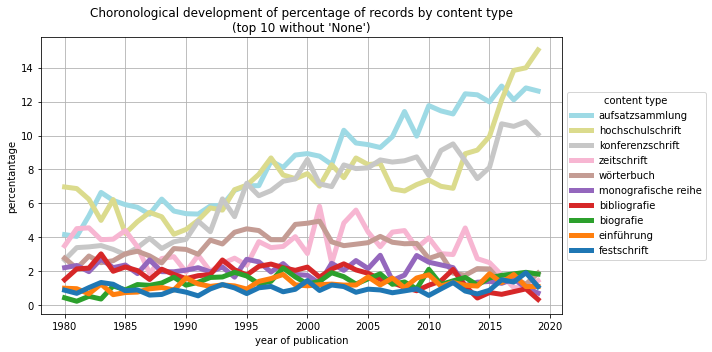

In [37]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,1:11], title = "Choronological development of percentage of records by content type\n(top 10 without 'None')", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_type", title_legend = "content type")


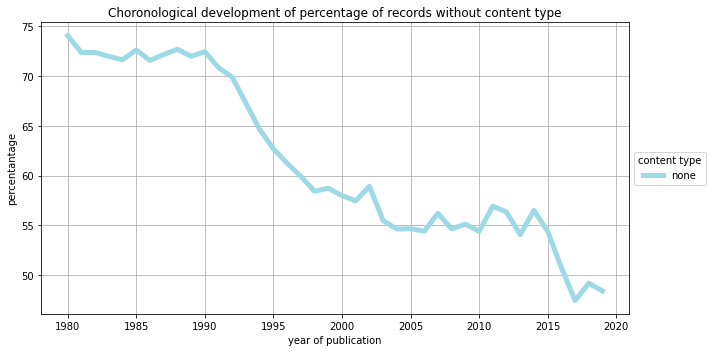

In [38]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,0:1], title = "Choronological development of percentage of records without content type", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_type_none", title_legend = "content type")


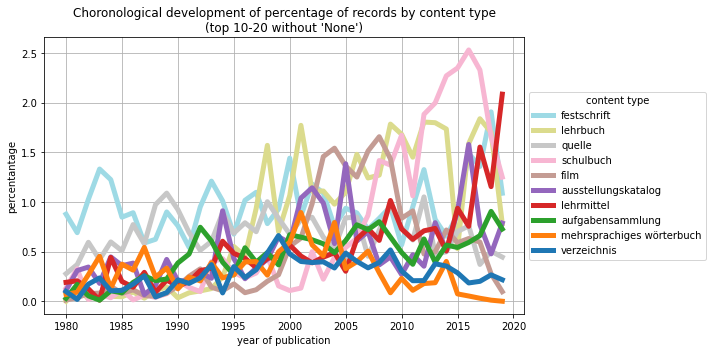

In [39]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,10:21], title = "Choronological development of percentage of records by content type\n(top 10-20 without 'None')", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_20", title_legend = "content type")


C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


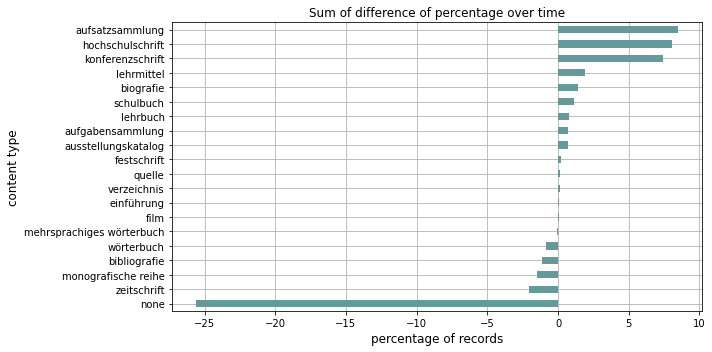

In [40]:
visualize.plot_bars(years_content_type_rel_df.diff(), percentage = False, title = "Sum of difference of percentage over time", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_content_type")

In [41]:
years_content_type_rel_df.columns.tolist()

['none',
 'aufsatzsammlung',
 'hochschulschrift',
 'konferenzschrift',
 'zeitschrift',
 'wörterbuch',
 'monografische reihe',
 'bibliografie',
 'biografie',
 'einführung',
 'festschrift',
 'lehrbuch',
 'quelle',
 'schulbuch',
 'film',
 'ausstellungskatalog',
 'lehrmittel',
 'aufgabensammlung',
 'mehrsprachiges wörterbuch',
 'verzeichnis']

In [42]:
regression_results_content_type_df = statistical_tests.calculate_regression_line(years_content_type_rel_df)

In [43]:
regression_results_content_type_df.loc[(regression_results_content_type_df["pvalue"] < 0.001) & (regression_results_content_type_df["slope"] > 0) ]

column     slope   intercept    rvalue  \
column                                                                     
aufsatzsammlung          aufsatzsammlung  0.226967 -445.279949  0.966720   
konferenzschrift        konferenzschrift  0.198933 -391.087391  0.945231   
hochschulschrift        hochschulschrift  0.163928 -320.218998  0.758615   
schulbuch                      schulbuch  0.056887 -113.025405  0.840682   
lehrbuch                        lehrbuch  0.049443  -98.028040  0.843981   
lehrmittel                    lehrmittel  0.027035  -53.530508  0.788925   
film                                film  0.024311  -48.095660  0.553990   
biografie                      biografie  0.023025  -44.646298  0.586046   
ausstellungskatalog  ausstellungskatalog  0.016003  -31.461515  0.540804   
aufgabensammlung        aufgabensammlung  0.015519  -30.568799  0.772217   
einführung                    einführung  0.013889  -26.554808  0.517307   

                           pvalue    stderr  
column                                       
aufsatzsammlung      4.223936e-24  0.009744  
konferenzschrift     4.518564e-20  0.011144  
hochschulschrift     1.416555e-08  0.022839  
schulbuch            1.142357e-11  0.005944  
lehrbuch             7.912929e-12  0.005097  
lehrmittel           1.476877e-09  0.003416  
film                 2.083915e-04  0.005927  
biografie            7.088295e-05  0.005164  
ausstellungskatalog  3.148131e-04  0.004038  
aufgabensammlung     5.359368e-09  0.002071  
einführung           6.304079e-04  0.003727

In [44]:
regression_results_content_type_df.loc[(regression_results_content_type_df["pvalue"] < 0.001) & (regression_results_content_type_df["slope"] < 0) ]

column     slope    intercept    rvalue        pvalue  \
column                                                                      
bibliografie  bibliografie -0.037162    76.000591 -0.687682  9.468374e-07   
none                  none -0.678245  1417.591223 -0.951153  5.411655e-21   

                stderr  
column                  
bibliografie  0.006364  
none          0.035712

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


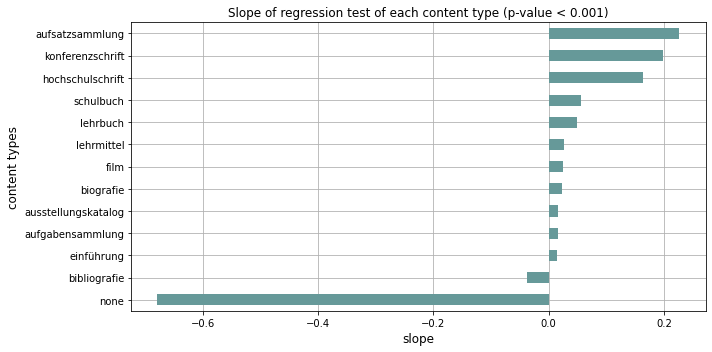

In [45]:
visualize.plot_bars(regression_results_content_type_df.loc[regression_results_content_type_df["pvalue"] < 0.001][["slope"]].T, title ="Slope of regression test of each content type (p-value < 0.001)", xlabel ="slope", ylabel = "content types", figure_name = "bar_slop_content_type", figsize=(10,5))